In [4]:
import sys
sys.path.append("../src/")
sys.path.append("../src/AtomicT")

In [5]:
from AtomicH import spinexchange
from AtomicH import potentials
from AtomicH import dipolelosses
from AtomicH import constants
import numpy as np
import pylab as plt

from spinexchange import SpinExChannels

In [3]:
B_values = np.logspace(-3,1,50)
potT     = potentials.Silvera_Triplet
potS     = potentials.Kolos_Singlet2_VDW

T        = 1e-5

GVsB_H=[]
GVsB_T=[]

for c in SpinExChannels:
    Gs=[]
    for B in B_values:
        Gs.append(spinexchange.GetGFactor(c,  B, constants.HydrogenConstants(), T, potT,potS,np.linspace(1e-9,0.75,20000)))
    GVsB_H.append(np.array(Gs))
    Gs=[]

    for B in B_values:
        Gs.append(spinexchange.GetGFactor(c,  B, constants.TritiumConstants(), T, potT,potS,np.linspace(1e-9,0.75,20000)))
    GVsB_T.append(np.array(Gs))


In [4]:
# To make the plots with real B on x axis
B_display=B_values

# To make the plots with Stoof scaled B on x axis
#B_display=dipolelosses.B_Naught(B_values)

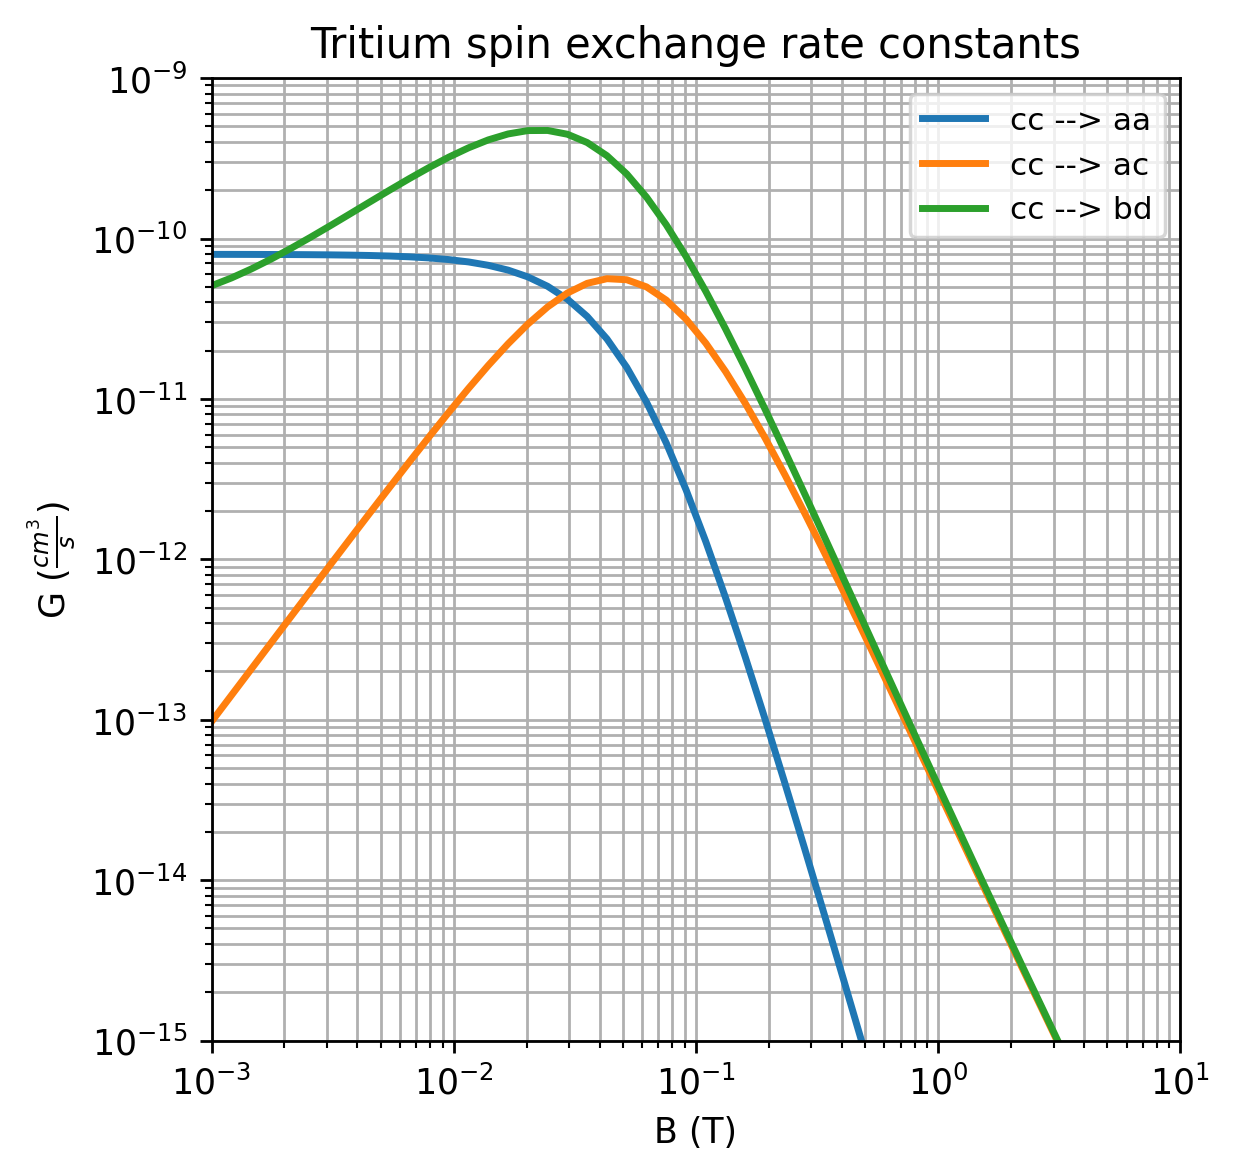

In [5]:
plt.figure(figsize=(5,5),dpi=250)
for ci in range(0,len(SpinExChannels)):
    Label='cc --> '+str(SpinExChannels[ci]['alphaprime'])+str(SpinExChannels[ci]['betaprime'],)
    plt.plot(B_values,GVsB_T[ci],label=Label,linewidth=2)
    plt.semilogy()
plt.xlim(1e-3,10)
plt.ylim(1e-15,1e-9)
plt.xlabel("B (T)")
plt.ylabel(r'G ($\frac{cm^3}{s}$)')
plt.title("Tritium spin exchange rate constants")
plt.grid(which='both')
plt.legend(fontsize=9, loc='upper right')
plt.loglog()
plt.savefig("./Plots/SpinExLossesTT.png",bbox_inches='tight',dpi=250)
plt.show()


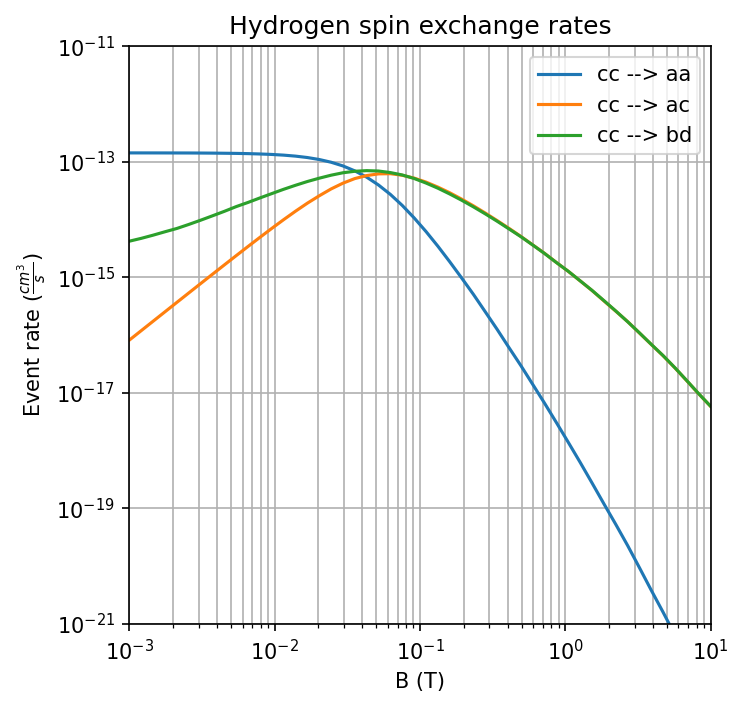

In [7]:
plt.figure(figsize=(5,5),dpi=150)
for ci in range(0,len(SpinExChannels)):
    Label='cc --> '+str(SpinExChannels[ci]['alphaprime'])+str(SpinExChannels[ci]['betaprime'])
    plt.plot(B_display, GVsB_H[ci],label=Label)
    plt.semilogy()
plt.ylim(1e-21,1e-11)
plt.xlim(1e-3,10)
plt.xlabel("B (T)")
plt.ylabel(r'Event rate ($\frac{cm^3}{s}$)')
plt.title("Hydrogen spin exchange rates")
plt.grid(which='both')
plt.legend()
plt.loglog()
plt.savefig("./Plots/SpinExLossesHH.png",bbox_inches='tight',dpi=250)
plt.show()